In [ ]:
#Use the py eddy tracker to build a circle depending on radius

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from py_eddy_tracker.dataset.grid import RegularGridDataset
from py_eddy_tracker.observations.observation import EddiesObservations
from py_eddy_tracker.generic import build_circle
import xarray as xr 
import matplotlib.pyplot as plt
import pandas as pd
import netCDF4 as nc
import datetime as dt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
from scipy.stats import linregress
import numpy.ma as ma

In [3]:
#a = EddiesObservations.load_file('/data/watkinson/Summer2022/data/eddies/Anticyclonic/Anticyclonic_20040101.nc')#anticyclonic eddy data
#c = EddiesObservations.load_file('/data/watkinson/Summer2022/data/eddies/Cyclonic/Cyclonic_20040101.nc')
a = xr.open_dataset('/data/watkinson/Summer2022/data/eddies/Anticyclonic/Anticyclonic_20040101.nc')
c = xr.open_dataset('/data/watkinson/Summer2022/data/eddies/Cyclonic/Cyclonic_20040101.nc')
SSH_data = xr.open_dataset('/data/watkinson/Summer2022/data/hycom_ssh/Daily_SSH_files/hycom_gomu_501_2004010100_t000.nc')
anti_eddy_lon_center = a.longitude
cycl_eddy_lon_center = c.longitude
anti_eddy_lat_center = a.latitude
cycl_eddy_lat_center = c.latitude
anti_eddy_radius = a.effective_radius
cycl_eddy_radius = c.effective_radius
#print(
#cycl_eddy_radius

In [16]:
lon_c = cycl_eddy_lon_center[9]
lat_c = cycl_eddy_lat_center[9]
radius_c = cycl_eddy_radius[9]
#print(lon_c)
#print(lat_c)
#print(radius_c)

x = build_circle(269.36493,26.395357,72850)
#print(x)
x=np.array(x)
lon_c = np.array(x[0,:])
lat_c = np.array(x[1,:])
#print(lon)
from py_eddy_tracker.generic import local_to_coordinates
z_c = local_to_coordinates(lon_c,lat_c,269.36493,26.395357)
z_c = np.array(np.transpose(z_c))
print(z)


[[273.69200686  28.57685735]
 [273.68478677  28.69059062]
 [273.66101529  28.8025774 ]
 [273.6210319   28.91097074]
 [273.56544837  29.01397723]
 [273.49514179  29.10988733]
 [273.41124268  29.19710455]
 [273.31511817  29.27417311]
 [273.2083504   29.33980346]
 [273.0927104   29.39289503]
 [272.97012791  29.43255593]
 [272.84265764  29.45811891]
 [272.7124427   29.46915348]
 [272.58167599  29.46547371]
 [272.45256044  29.44714161]
 [272.327269    29.41446601]
 [272.20790533  29.36799691]
 [272.09646612  29.30851559]
 [271.99480581  29.23702043]
 [271.90460461  29.15470908]
 [271.8273402   29.06295718]
 [271.76426393  28.96329414]
 [271.71638148  28.85737651]
 [271.68443856  28.74695948]
 [271.66891146  28.63386703]
 [271.6700025   28.51996132]
 [271.6876402   28.40711185]
 [271.72148397  28.29716487]
 [271.77093294  28.19191356]
 [271.83513867  28.09306947]
 [271.91302127  28.00223546]
 [272.00328869  27.92088077]
 [272.1044586   27.85031827]
 [272.21488263  27.7916844 ]
 [272.33277253

In [14]:
lon = anti_eddy_lon_center[3]
lat = anti_eddy_lat_center[3]
radius = anti_eddy_radius[3]
#print(lon)
#print(lat)
#print(radius)
x = build_circle(272.6769,28.580378,98850)
#print(x)
x=np.array(x)
lon = np.array(x[0,:])
lat = np.array(x[1,:])
#print(lon)
from py_eddy_tracker.generic import local_to_coordinates
z = local_to_coordinates(lon,lat,272.6769,28.580378)
z = np.array(np.transpose(z))
#print(z)

File was created with py-eddy-tracker version 'None' but software version is '3.6'
File was created with py-eddy-tracker version 'None' but software version is '3.6'


<xarray.DataArray 'adt' ()>
array(-1.092, dtype=float32)
<xarray.DataArray 'adt' ()>
array(0.583, dtype=float32)


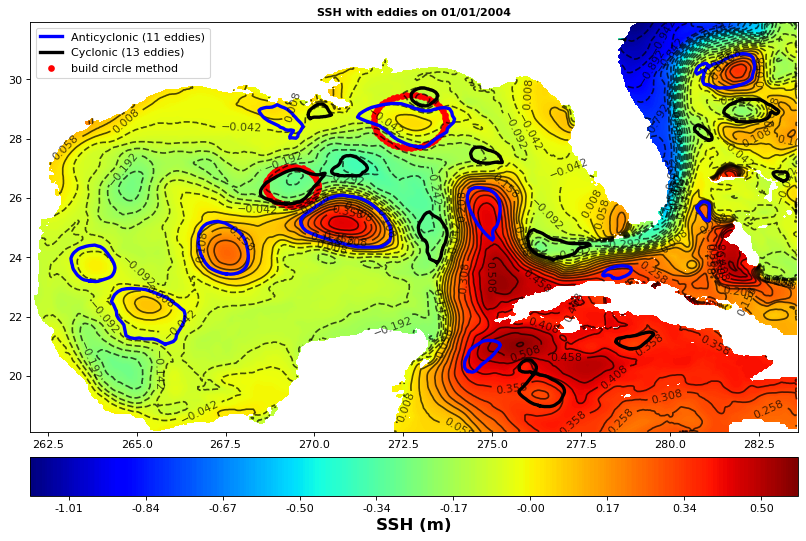

In [17]:
fig = plt.figure(figsize=(12, 8), dpi=80)
#ax = fig.add_axes([.03,.03,.94,.94])
ax = fig.add_axes([.03,.03,.8,.8])
#ax.set_xlim(-97.5, -77.5)
#plt.title('Final Amplitude Adjustments?: Max # local extrema in contour=5, Min # of intervals to consider contour as eddy=6' 
        #'\n# of intervals to be considered another extrema=2',loc='center',fontsize=10,fontweight='bold',y=1.03)
plt.title('SSH with eddies on 01/01/2004',loc='center',fontsize=10,fontweight='bold')#,y=1.03)
#plt.suptitle(date,color='red',fontsize=12,fontweight='bold',x=.4,y=.85)
#load in lat, lon and SSh data for plot and print min and max SSH
anti = EddiesObservations.load_file('/data/watkinson/Summer2022/data/eddies/Anticyclonic/Anticyclonic_20040101.nc')#anticyclonic eddy data
cycl = EddiesObservations.load_file('/data/watkinson/Summer2022/data/eddies/Cyclonic/Cyclonic_20040101.nc')
lat_sat=SSH_data.lat
lon_sat=SSH_data.lon+360
ssh = SSH_data.adt
print(np.min(ssh))
print(np.max(ssh))
#Make lon and lat a 2d mesh grid for plotting purposes
lon2d,lat2d=np.meshgrid(lon_sat,lat_sat)
#cf = ax.contourf(lon2d,lat2d,ssh[:,:,0],cmap='viridis',levels=np.linspace(-1.6,1,400))
#cl = ax.contour(lon2d,lat2d,ssh[:,:,0],colors='w',alpha=.7,levels=np.arange(-1.6,1,.1))
cf = ax.contourf(lon2d,lat2d,ssh[:,:,0],cmap='jet',levels=np.linspace(np.min(ssh),np.max(ssh),400))
cl = ax.contour(lon2d,lat2d,ssh[:,:,0],colors='k',alpha=.7,levels=np.arange(np.min(ssh),np.max(ssh),.05))
#Use to add legend with the number of anticyclonic and cyclonic eddies that day
#anti.circle_contour()
#cycl.circle_contour()
anti.display(ax, extern_only=True, label='Anticyclonic ({nb_obs} eddies)',color='blue',lw=3,ls='solid') 
cycl.display(ax, extern_only=True, label="Cyclonic ({nb_obs} eddies)", color="k", lw=3,ls='solid')
#displays all the contours from the HYCOM data and which ones were accepted as eddies and which ones were not including the reason
#g.contours.display(ax,display_criterion=True)
plt.clabel(cl, inline=1, fontsize=10)
cbar = fig.colorbar(cf,location='bottom',format='%.2f',pad=.05)#shrink=.6,pad=.04)
cbar.ax.set_xlabel('SSH (m)',fontsize=15,fontweight='bold')
plt.scatter(z[:,0],z[:,1],c='red',marker='.',lw=3,label='build circle method')
plt.scatter(z_c[:,0],z_c[:,1],c='red',marker='.',lw=3)#,label='build circle method')
_= ax.legend(loc="best")